In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"/Users/kruthikasaisree/Downloads/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df = df.drop(columns=['Channel', 'Region'], axis=1)


In [9]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [10]:
std_scaler=StandardScaler()
scale_array=std_scaler.fit_transform(df)

In [11]:
scale_array

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [12]:
scale_array.shape

(440, 6)

In [13]:
scale_array.size

2640

In [14]:
from sklearn.preprocessing import StandardScaler
st_scaler=StandardScaler()
x=st_scaler.fit_transform(df)


In [15]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [16]:
type(x)

numpy.ndarray

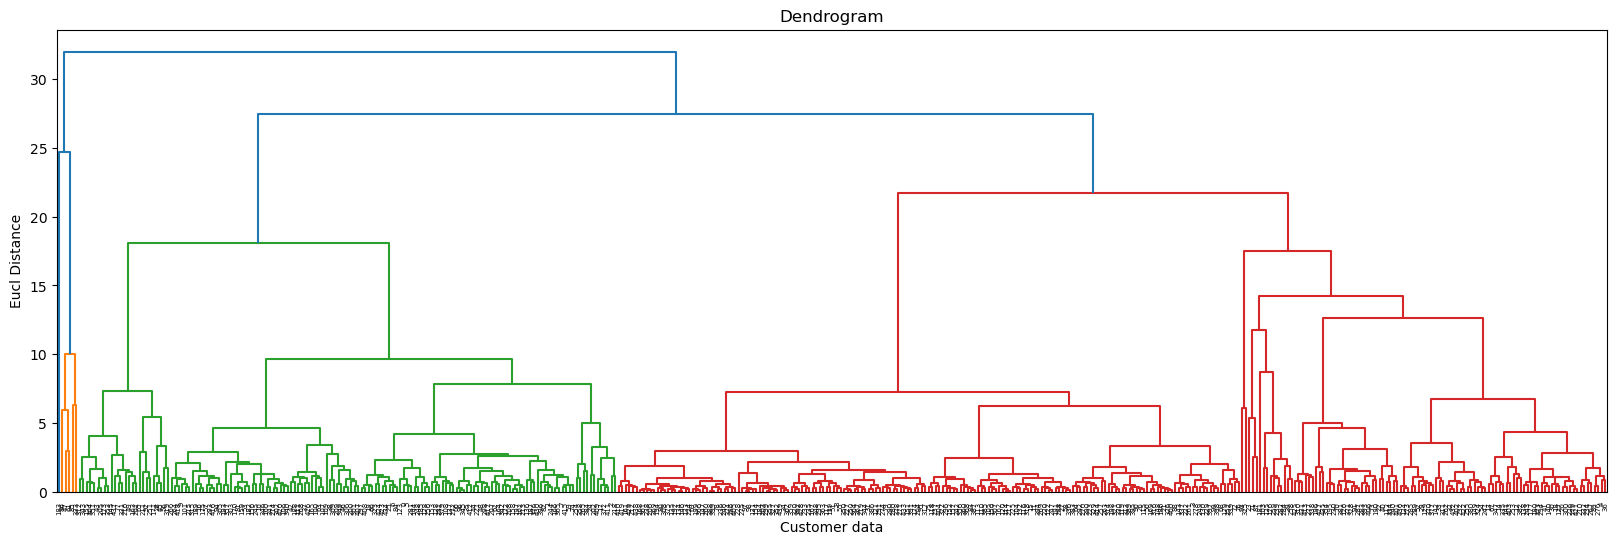

In [17]:
import scipy.cluster.hierarchy as sch
#responsible for creating the plot of hierarchical data model and to know the number of clusters or groups
plt.figure(figsize=(20,6))
dendo= sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [18]:
#no of groups we can create with our data
len(set(dendo['color_list']))-1

3

In [19]:
from sklearn.cluster import AgglomerativeClustering
group=AgglomerativeClustering(n_clusters=3)
group.fit_predict(x)

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [20]:
cluster=group.fit_predict(x)

In [21]:
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [22]:
cluster.shape

(440,)

In [23]:
#converting array into dataframe
group_num=pd.DataFrame(cluster,columns=['Group'])

In [24]:
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [25]:
pd.concat([df,group_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(x,cluster)

0.2646091480214908

# Kmeans

In [28]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [29]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++' , random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [30]:
wcss

[2266.9552665832452,
 1644.0598512347565,
 1326.6746082135533,
 1070.2551995135614,
 989.3326418885058,
 856.7070228388116,
 791.8280762163154,
 710.1943394067519,
 668.22250548469]

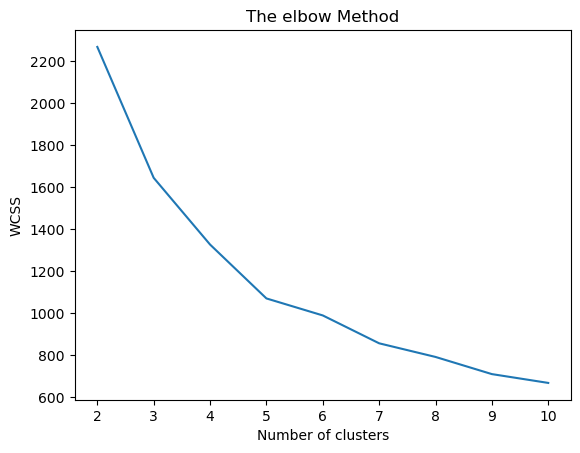

In [31]:
#this plot is called as elbow method.to know about of clusters in kmeans
#the point where the elbow point obtains is the good number of clusters(for example: 4 or 5 in the below example)
plt.plot(range(2,11),wcss)
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
#fitting kmeans to the dataset
model = KMeans(n_clusters = 5, random_state = 309)
groups = model.fit_predict(x)

In [67]:
groups

array([2, 0, 0, 2, 4, 2, 2, 2, 2, 0, 0, 2, 4, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       4, 0, 0, 2, 2, 2, 0, 4, 2, 2, 2, 4, 2, 0, 4, 0, 0, 4, 4, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 2, 2, 4, 0, 2, 2, 3, 0, 2, 2, 2, 3, 2, 0, 2, 3,
       2, 0, 2, 2, 4, 0, 2, 4, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 3, 3, 4,
       2, 4, 2, 2, 3, 4, 0, 2, 2, 2, 2, 2, 0, 0, 2, 4, 2, 2, 0, 0, 2, 0,
       2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       4, 2, 2, 2, 2, 4, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 4, 4, 0,
       2, 2, 0, 0, 4, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 4, 0, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [71]:
type(groups)

numpy.ndarray

In [73]:
groups.size

440

In [75]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [79]:
group_num=pd.DataFrame(groups,columns=['Groups'])
group_num

,Groups
0,2
1,0
2,0
3,2
4,4
...,...
435,4
436,4
437,0
438,2


In [81]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,4
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,4
436,39228,1431,764,4510,93,2346,4
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,2


In [83]:
cust_kmeans_data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Groups              0
dtype: int64

In [93]:
cust_kmeans_data[cust_kmeans_data['Groups']==0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
9,6006,11093,18881,1159,7425,2098,0
10,3366,5403,12974,4400,5977,1744,0
13,21217,6208,14982,3095,6707,602,0
...,...,...,...,...,...,...,...
416,4389,10940,10908,848,6728,993,0
418,660,8494,18622,133,6740,776,0
420,4456,5266,13227,25,6818,1393,0
426,13134,9347,14316,3141,5079,1894,0


In [95]:
cust_kmeans_data[cust_kmeans_data['Groups']==1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
183,36847,43950,20170,36534,239,47943,1


In [97]:
cust_kmeans_data[cust_kmeans_data['Groups']==0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
9,6006,11093,18881,1159,7425,2098,0
10,3366,5403,12974,4400,5977,1744,0
13,21217,6208,14982,3095,6707,602,0
...,...,...,...,...,...,...,...
416,4389,10940,10908,848,6728,993,0
418,660,8494,18622,133,6740,776,0
420,4456,5266,13227,25,6818,1393,0
426,13134,9347,14316,3141,5079,1894,0


In [99]:
cust_kmeans_data[cust_kmeans_data['Groups']==1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
183,36847,43950,20170,36534,239,47943,1


In [101]:
cust_kmeans_data[cust_kmeans_data['Groups']==3]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
47,44466,54259,55571,7782,24171,6465,3
56,4098,29892,26866,2616,17740,1340,3
61,35942,38369,59598,3254,26701,2017,3
65,85,20959,45828,36,24231,1423,3
85,16117,46197,92780,1026,40827,2944,3
86,22925,73498,32114,987,20070,903,3
92,9198,27472,32034,3232,18906,5130,3
211,12119,28326,39694,4736,19410,2870,3
251,6134,23133,33586,6746,18594,5121,3
333,8565,4980,67298,131,38102,1215,3


In [103]:
cust_kmeans_data[cust_kmeans_data['Groups']==4]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
4,22615,5410,7198,3915,1777,5185,4
12,31714,12319,11757,287,3881,2931,4
22,31276,1917,4469,9408,2381,4334,4
29,43088,2100,2609,1200,1107,823,4
33,29729,4786,7326,6130,361,1083,4
...,...,...,...,...,...,...,...
425,11243,2408,2593,15348,108,1886,4
427,31012,16687,5429,15082,439,1163,4
431,8533,5506,5160,13486,1377,1498,4
435,29703,12051,16027,13135,182,2204,4


In [113]:
#to evaluate the performance of kclustering model we use this sihouette score metrics
silhouette_score(x,groups)

0.3676564632042091

In [117]:
np.round(silhouette_score(x,groups),2)

0.37

# DBSCAN

In [124]:
#dbscan is used for outlier detection like fraud detection
#we need three points to use the dbscan those are border points,core points and noise
#we need to other parameter they are epsilon(will draw radius around all the points) and minimum points
#no of points within the epsilon circle are more than minimum points then that point becomes core points
#no of points within the epsilon circle are less than minimum points then that point becomes border points
#noisee is a point which is an outlier

In [ ]:
dbscan = DBSCAN(eps